# Proyecto final 2023

# Matemáticas para Ciencia de Datos

#### Ejercicio 1. Haz un programa que dada una matriz $A$ y $k$ regrese $A^{(k)}$, $σ_1$, . . . $σ_{k+1}$. Usa la librería https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html.

In [49]:
# Importar librerías a utilizar
import numpy as np
from sklearn.decomposition import TruncatedSVD

Crear función para obtener descomposición SVD truncada de una matriz, junto con los valores singulares respectivos.

In [2]:
# Definir función "truncated_svd_and_singular_values()"
def truncated_svd_and_singular_values(matrix, k):
    """Esta función recibe como input una matriz y un número entero k.
       Como output regresa la descomposición SVD truncada en k de la
       matriz y los primeros k+1 valores singulares"""

    try:
        # Descomposición SVD truncada
        svd = TruncatedSVD(n_components=k+1)
        svd.fit(matrix)

        # Obtener la matriz transformada A^(k)
        matrix_k = svd.transform(matrix)

        # Obtener los valores singulares σ_1, ..., σ_{k+1}
        singular_values = svd.singular_values_

        # Output matriz transformada y valores singulares
        return matrix_k, singular_values

    except ValueError:
        raise ValueError("El valor de k debe ser menor o igual al número de características en la matriz.")

Ejemplo de uso de la función.

In [3]:
# Matriz 200x300 con valores aleatorios entre 0 y 255
A = 255 * np.random.rand(200, 300)
# Valor entero k
k = 100

# Obtener la descomposición SVD truncada en k y los valores singulares
A_k, singular_values = truncated_svd_and_singular_values(A, k)

# Imprimir resultados
print("Matriz A^(k):\n")
print(A_k)
print("\nValores singulares σ_1, ..., σ_{k+1}:\n")
print(singular_values)

Matriz A^(k):

[[2284.19534152   45.83286464    3.16227304 ...  -63.36228363
   155.81138342    4.83104453]
 [2188.40627148 -123.23605702  -73.48816302 ... -114.40943452
    73.33810338   15.61211319]
 [2126.99655316  221.79043661 -117.1074129  ...  -34.40544093
  -125.70671595   73.67554861]
 ...
 [2146.4074424  -186.39113502  -87.87970045 ...  -39.25388594
    92.80912301   78.18504745]
 [2296.51096315  -25.8173158   210.40655449 ...  117.65902076
   -40.83724881   30.15983336]
 [2253.87849806   86.43487434 -102.22977628 ... -166.55512877
    -5.89946061  -83.76922125]]

Valores singulares σ_1, ..., σ_{k+1}:

[31335.66827607  2261.50369929  2239.61510206  2212.34202856
  2179.07169581  2154.81611592  2132.52300947  2116.31009383
  2104.35811943  2070.72379896  2059.22754784  2051.32721851
  2023.56480654  2022.32023724  1999.15869738  1989.88497307
  1980.6464516   1962.66387701  1954.20495758  1935.55083229
  1916.03984051  1904.93854697  1892.40818986  1886.84701806
  1864.95519556

#### Ejercicio 2. Crea una matriz de la "imagen en blanco". ¿Cuál es el rank de esa matriz? Responde la misma pregunta con la matriz corespondiente a una imagen nítida de la bandera de Indonesia y también de la bandera Italiana.

In [47]:
import numpy as np
# importamos el modulo pyplot, y lo llamamos plt
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
# comando de Jupyter para que las imagenes se muestren automaticamente
%matplotlib inline

EL rank de la matriz a partir de la imagen: 1


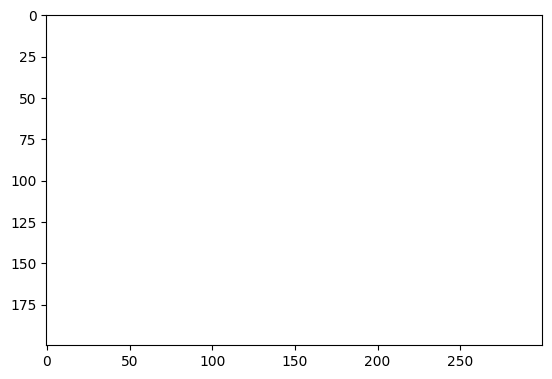

<Figure size 640x480 with 0 Axes>

In [45]:
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'

#tamaño de las matrices a visualizar
size=(200,300)

# IMAGEN BLANCA
# Una matriz de unos.
imagen_blanca = np.ones(size)

#visualizamos la matriz
#Se ve como una imagen blanca, ya que todos los elementos (pixeles) tienen intensidad 1
plt.imshow(imagen_blanca,vmin=0,vmax=1)

plt.figure()

# Calculando el rank de la matriz de la imagen en blanco
rango_imagen_blanca = np.linalg.matrix_rank(imagen_blanca)
print(f'EL rank de la matriz a partir de la imagen: {rango_imagen_blanca}')

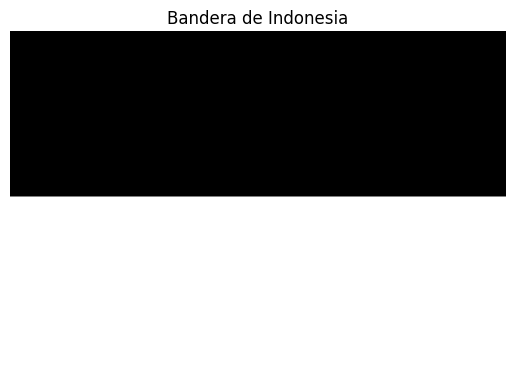

EL rank de la matriz a partir de la imagen de Indonesia: 1


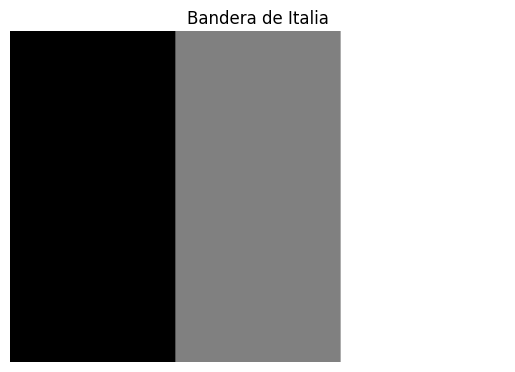

EL rank de la matriz a partir de la imagen de Italia: 1


In [52]:
# ------------------------------ Trabajando con las banderas -------------------------------------------------

# la ruta de cada imagen
path_indonesia = "imagenes/Flag_of_Indonesia.png"
path_italia = "imagenes/Flag_of_Italy.png"

# Cargando las imágenes de as banderas
imagen_indonesia = Image.open(path_indonesia)
imagen_italia = Image.open(path_italia)

# Convertiendo las imágenes a matrices NumPy de tamaño (200 x 300)
matriz_indonesia = np.array(imagen_indonesia.resize((300, 200)))
matriz_italia = np.array(imagen_italia.resize((300, 200)))

# Visualizando la bandera de Indonesia
plt.imshow(matriz_indonesia)
plt.title('Bandera de Indonesia')
plt.axis('off')
plt.show()

# Calculando el rank de la bandera de Indonesia
rango_indonesia = np.linalg.matrix_rank(matriz_indonesia)
print(f'EL rank de la matriz a partir de la imagen de Indonesia: {rango_indonesia}')

# Visualizando la bandera de Italia
plt.imshow(matriz_italia)
plt.title('Bandera de Italia')
plt.axis('off')
plt.show()

# Calculando el rank de la bandera de Italia
rango_italia = np.linalg.matrix_rank(matriz_italia)
print(f'EL rank de la matriz a partir de la imagen de Italia: {rango_italia}')

> El hecho de que todas las imágenes tengan un rank de 1 podría ser un indicativo de que las imágenes son bastante simples y pueden ser representadas con una sola dimensión (un solo vector). El rango de una matriz indica la cantidad de dimensiones linealmente independientes en esa matriz. Si todas las filas (o columnas) de una matriz son múltiplos escalares unas de otras, el rank será 1.
>
>Las imágenes con las que se trabajó en este ejercicio, se podría decir que son bastante uniformes en intensidad, por lo tanto, una sola dimensión es suficiente para representarlas linealmente.
>
>Si las imágenes de las banderas de Indonesia e Italia son bastante simples, es normal obtener un rango bajo.


#### Ejercicio 3. Elija una fotografía de tu interés. Encuentra la mejor aproximación de rango $k$ para $k$ = 2, 5, 10, 15. Conviértelos a imagen otra vez y obsérvalas junto con la imagen original. Puedes probar con otras imágenes y valores de $k$.